# Libraries

## for DataFrame 

In [2]:
import pandas as pd
import numpy as np

## for Visualization

In [91]:
import matplotlib.pyplot  as plt
import seaborn as sns
import graphviz
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.model_selection import validation_curve

##  Success Metrics

In [4]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

## Model

In [111]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
import joblib

In [103]:
pip install skompiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.5 MB/s 
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54331 sha256=9a87676f0e60b65739d33a3d8e6c2a8bd2cc6d0a93e3c45ba6ee01543094f004
  Stored in directory: /root/.cache/pip/wheels/eb/73/c6/cf0fc98d965e01e8bb3b1923d1e6a57374645d5d055f00e898
Successfully built skompiler


In [104]:
from skompiler import skompile

# Exploring Data

In [6]:
df_ = pd.read_csv("/content/drive/MyDrive/veriler/churn (1).csv")

In [7]:
df = df_.copy()

In [8]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


In [9]:
df.describe([.01, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99]).T

,count,mean,std,min,1%,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,max
Age,900.0,41.816667,6.127560,22.0,28.0000,32.0000,34.000,37.000,38.700,40.000,42.000,43.000,45.000,47.000,50.000,52.0000,55.0100,65.00
Total_Purchase,900.0,10062.824033,2408.644532,100.0,4688.9034,6080.7070,6852.109,8092.934,8797.008,9402.944,10045.870,10675.296,11431.908,12219.838,13124.127,13769.5000,15423.8994,18026.01
Account_Manager,900.0,0.481111,0.499921,0.0,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.0000,1.0000,1.00
Years,900.0,5.273156,1.274449,1.0,2.2096,3.1565,3.718,4.260,4.610,4.950,5.215,5.580,5.900,6.350,6.890,7.3505,8.3606,9.15
Num_Sites,900.0,8.587778,1.764836,3.0,5.0000,6.0000,6.000,7.000,8.000,8.000,8.000,9.000,9.000,10.000,11.000,12.0000,13.0000,14.00
Churn,900.0,0.166667,0.372885,0.0,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.0000,1.0000,1.00


In [10]:
df.shape

(900, 7)

In [11]:
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Churn              0
dtype: int64

In [12]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [13]:
df.sample(10)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
79,Todd Thompson,38.0,12520.53,1,6.30,11.0,1
368,Stephanie Juarez,41.0,5191.08,0,6.29,7.0,0
206,Gina Richardson,33.0,13157.08,1,5.04,10.0,0
331,Julie Moore,40.0,8911.91,0,6.99,10.0,0
27,Troy Oliver,40.0,10041.13,0,7.61,11.0,1
650,Amy Riddle,45.0,8389.84,1,6.81,5.0,0
531,Lauren Johnson,47.0,10332.16,1,4.89,9.0,0
779,Joel Johnson,55.0,5977.46,1,5.02,7.0,0
440,Taylor Grant,39.0,10643.67,0,5.54,10.0,0
192,Brian Love,44.0,8755.02,1,5.71,8.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 49.3+ KB


In [15]:
df.nunique()

Names              899
Age                 36
Total_Purchase     900
Account_Manager      2
Years              418
Num_Sites           12
Churn                2
dtype: int64

In [16]:
for col_name in df.iloc[:, 1:].columns:
    print(df[col_name].value_counts(), end="\n\n\n")

41.0    69
43.0    59
40.0    58
45.0    56
44.0    53
38.0    51
42.0    49
46.0    48
39.0    48
37.0    48
36.0    39
48.0    36
35.0    32
49.0    30
47.0    29
34.0    25
51.0    21
52.0    20
32.0    18
33.0    16
50.0    15
55.0    14
31.0    11
30.0    11
29.0     9
54.0     8
53.0     8
56.0     5
28.0     5
58.0     2
26.0     2
65.0     1
60.0     1
25.0     1
27.0     1
22.0     1
Name: Age, dtype: int64


11066.80    1
8748.36     1
8929.88     1
9435.20     1
11553.65    1
           ..
13680.25    1
5900.78     1
10339.05    1
11538.57    1
9315.60     1
Name: Total_Purchase, Length: 900, dtype: int64


0    467
1    433
Name: Account_Manager, dtype: int64


5.07    8
5.89    8
5.98    7
4.61    7
5.51    7
       ..
7.34    1
3.35    1
5.96    1
7.03    1
2.67    1
Name: Years, Length: 418, dtype: int64


8.0     213
9.0     186
7.0     146
10.0    131
11.0     83
6.0      67
12.0     32
5.0      22
13.0      8
14.0      6
4.0       4
3.0       2
Name: Num_Sites, dtype:

In [17]:
for col_name in df.iloc[:, 1:].columns:
    print(df.groupby("Churn").agg({col_name: ["mean", "count"]}), end="\n\n\n")

             Age      
            mean count
Churn                 
0      41.581333   750
1      42.993333   150


      Total_Purchase      
                mean count
Churn                     
0       10036.952853   750
1       10192.179933   150


      Account_Manager      
                 mean count
Churn                      
0            0.465333   750
1            0.560000   150


          Years      
           mean count
Churn                
0      5.151067   750
1      5.883600   150


       Num_Sites      
            mean count
Churn                 
0       8.173333   750
1      10.660000   150


      Churn      
       mean count
Churn            
0       0.0   750
1       1.0   150




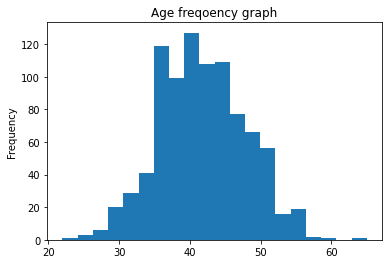

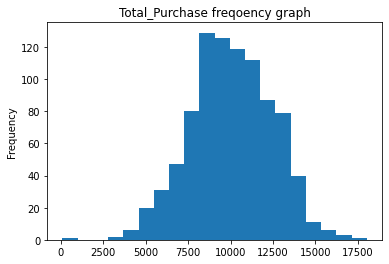

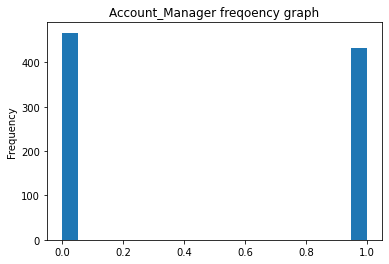

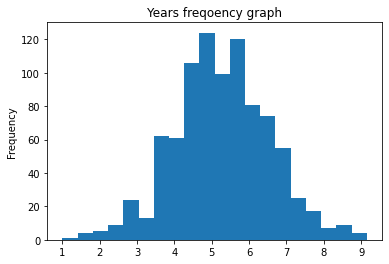

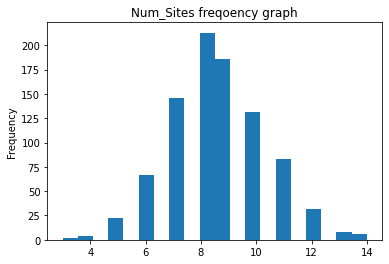

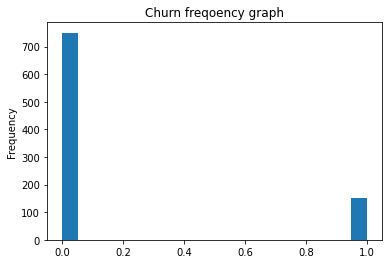

In [18]:
for col_name in df.iloc[:, 1:].columns:
    df[col_name].plot(kind="hist", bins=20)
    plt.title(f"{col_name} freqoency graph")
    plt.show(block=True)

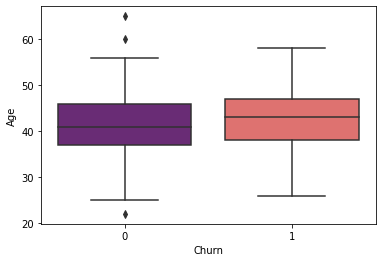

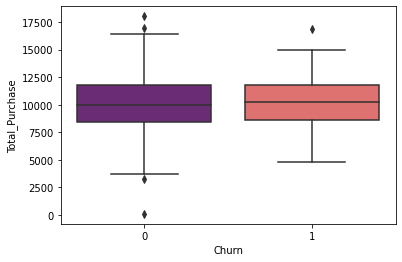

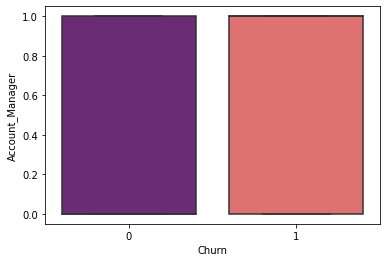

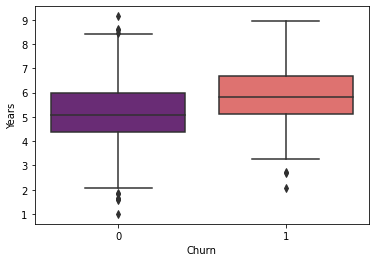

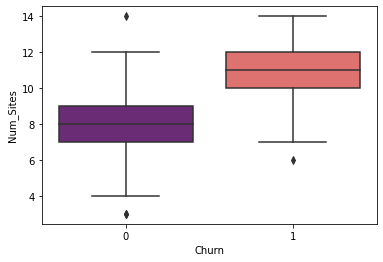

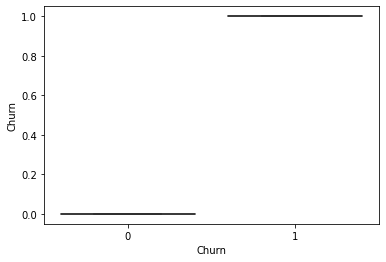

In [19]:
for col_name in df.iloc[:, 1:].columns:
    sns.boxplot(data=df, x="Churn", y=col_name, palette="magma")
    plt.show()

# Preprocessing & Feature Engineering

## Ordinal Değişkenler

yaşı ortalamanın altnıda olup total_purchase'i ort üstü olanlar

In [20]:
df.loc[(df["Age"] < df.Age.mean()) & (df["Total_Purchase"] > df.Total_Purchase.mean()), "New_var1"] = 4  # genc_iyi
df.loc[(df["Age"] > df.Age.mean()) & (df["Total_Purchase"] > df.Total_Purchase.mean()), "New_var1"] = 3  # yaslı_iyi
df.loc[(df["Age"] < df.Age.mean()) & (df["Total_Purchase"] < df.Total_Purchase.mean()), "New_var1"] = 2  # genç_kötü
df.loc[(df["Age"] > df.Age.mean()) & (df["Total_Purchase"] < df.Total_Purchase.mean()), "New_var1"] = 1  # yaslı_kötü

years ort. altı olup yüksek total_purchase olanlar

In [21]:
df.loc[(df["Years"] < df.Years.mean()) & (df["Total_Purchase"] > df.Total_Purchase.mean()), "New_var2"] = 4  # yeni_iyi
df.loc[(df["Years"] > df.Years.mean()) & (df["Total_Purchase"] > df.Total_Purchase.mean()), "New_var2"] = 3  # eski_iyi
df.loc[(df["Years"] < df.Years.mean()) & (df["Total_Purchase"] < df.Total_Purchase.mean()), "New_var2"] = 2  # yeni_kötü
df.loc[(df["Years"] > df.Years.mean()) & (df["Total_Purchase"] < df.Total_Purchase.mean()), "New_var2"] = 1  # eski_kötü

numsites düşük olan total_purchase yüksek olan

In [22]:
df.loc[(df["Num_Sites"] < df.Num_Sites.mean()) & (
        df["Total_Purchase"] > df.Total_Purchase.mean()), "New_var3"] = 4  # az_site - iyi_yatırım
df.loc[(df["Num_Sites"] > df.Num_Sites.mean()) & (
        df["Total_Purchase"] > df.Total_Purchase.mean()), "New_var3"] = 3  # çok_site - iyi_yatırım
df.loc[(df["Num_Sites"] < df.Num_Sites.mean()) & (
        df["Total_Purchase"] < df.Total_Purchase.mean()), "New_var3"] = 2  # az_site - kötü_yatırım
df.loc[(df["Num_Sites"] > df.Num_Sites.mean()) & (
        df["Total_Purchase"] < df.Total_Purchase.mean()), "New_var3"] = 1  # çok_site - kötü_yatırım


## Nominal Değişkenler

yası küçük olan year buyuk olan

In [23]:
df["New_var4"] = df["Years"] / df["Age"]

total_purchase / (abs(ort-age)*years*num_sites)

In [24]:
df["New_var5"] = df["Total_Purchase"] / (abs(df["Age"].mean() - df["Age"]) * df["Years"] * df["Num_Sites"])

In [25]:
df.head(5)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,New_var1,New_var2,New_var3,New_var4,New_var5
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1,3.0,3.0,4.0,0.171905,1045.089398
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1,4.0,3.0,3.0,0.158537,204.073983
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1,4.0,3.0,3.0,0.175526,42.177874
3,Phillip White,42.0,8010.76,0,6.71,10.0,1,1.0,1.0,1.0,0.159762,651.193063
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1,2.0,1.0,1.0,0.150270,38.135222


exploring data kısmında  görselleştirme işlemleri tekrar yapıldıgında New_var5 de outliers var bu yüzden basıkılama yapacagız

## Baskılama

In [26]:
def get_limit(df, col_name, q1, q3):
    q1 = df[col_name].quantile(q1)
    q3 = df[col_name].quantile(q3)

    iqr = q3 - q1

    up_limit = q3 + 1.5 * iqr
    low_limit = q1 - 1.5 * iqr

    return low_limit, up_limit

In [27]:
low_limit, up_limit = get_limit(df, "New_var5", 0.05, 0.95)

In [28]:
def replace_with_threshols(df, col_name, low, up):
    temporary_df = df.copy()

    temporary_df.loc[temporary_df[col_name] > up_limit, col_name] = up
    temporary_df.loc[temporary_df[col_name] < low_limit, col_name] = low

    return temporary_df

In [29]:
df = replace_with_threshols(df, "New_var5", low_limit, up_limit)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,900.0,41.816667,6.127560,22.000000,38.000000,42.000000,46.000000,65.000000
Total_Purchase,900.0,10062.824033,2408.644532,100.000000,8497.122500,10045.870000,11760.105000,18026.010000
Account_Manager,900.0,0.481111,0.499921,0.000000,0.000000,0.000000,1.000000,1.000000
Years,900.0,5.273156,1.274449,1.000000,4.450000,5.215000,6.110000,9.150000
Num_Sites,900.0,8.587778,1.764836,3.000000,7.000000,8.000000,10.000000,14.000000
Churn,900.0,0.166667,0.372885,0.000000,0.000000,0.000000,0.000000,1.000000
New_var1,900.0,2.485556,1.139254,1.000000,1.000000,2.000000,4.000000,4.000000
New_var2,900.0,2.507778,1.129514,1.000000,1.750000,2.000000,4.000000,4.000000
New_var3,900.0,2.495556,1.110663,1.000000,2.000000,2.000000,3.000000,4.000000
New_var4,900.0,0.128935,0.037136,0.031250,0.103469,0.126076,0.150992,0.247297


## Encoding & Standartization

encoding işlemine uygun kategorik değişkneler bulunmuyor
sadece standartizasyon uygulayacagız. aykırılıkları baskıladık ama yine de 
aykırılıklara bagışıklığı olan robust scaler kullanıyorum

In [31]:
df1 = df.iloc[:, 1:]

rscaler = RobustScaler()

df1_scaled = pd.DataFrame(rscaler.fit_transform(df1), columns=df1.columns)


# Modeling CART

bagımlı değişken: Churn

bagımsız değişkenler: 'Total_Purchase', 'Account_Manager', 'Years',
                     'Num_Sites', 'New_var1', 'New_var2', 'New_var3',
                     'New_var4', 'New_var5'

In [32]:
X = df1_scaled.drop("Churn", axis=1)


In [ ]:
y = df1_scaled["Churn"]

## model setup

In [33]:
DecisionTreeClassifier()._get_param_names()

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [34]:
cart_model = DecisionTreeClassifier()

## Splitting imbalanced data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [36]:
y_train.value_counts()

0.0    562
1.0    113
Name: Churn, dtype: int64

In [37]:
y_test.value_counts()

0.0    188
1.0     37
Name: Churn, dtype: int64

## Model Fitting

In [38]:
cart_model.fit(X_train, y_train)

DecisionTreeClassifier()

## Train: Prediction & Errors

### train predictions

In [39]:
y_train_pred = cart_model.predict(X_train)
y_train_prob = cart_model.predict_proba(X_train)[:, 1:]

### train errors

In [40]:
classification_report(y_train, y_train_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00       562\n         1.0       1.00      1.00      1.00       113\n\n    accuracy                           1.00       675\n   macro avg       1.00      1.00      1.00       675\nweighted avg       1.00      1.00      1.00       675\n'

In [41]:
confusion_matrix(y_train, y_train_pred)

array([[562,   0],
       [  0, 113]])

In [42]:
accuracy_score(y_train, y_train_pred)

1.0

In [43]:
recall_score(y_train, y_train_pred)

1.0

In [44]:
precision_score(y_train, y_train_pred)

1.0

In [45]:
f1_score(y_train, y_train_pred)

1.0

In [46]:
roc_auc_score(y_train, y_train_prob)

1.0

## Test: Prediction & Errors

### test predictions

In [47]:
y_test_pred = cart_model.predict(X_test)
y_test_prob = cart_model.predict_proba(X_test)[:, 1:]

### test errors

In [48]:
classification_report(y_test, y_test_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.89      0.91      0.90       188\n         1.0       0.48      0.43      0.46        37\n\n    accuracy                           0.83       225\n   macro avg       0.69      0.67      0.68       225\nweighted avg       0.82      0.83      0.83       225\n'

In [49]:
confusion_matrix(y_test, y_test_pred)

array([[171,  17],
       [ 21,  16]])

In [50]:

accuracy_score(y_test, y_test_pred)


0.8311111111111111

In [51]:
recall_score(y_test, y_test_pred)


0.43243243243243246

In [52]:
precision_score(y_test, y_test_pred)


0.48484848484848486

In [53]:
f1_score(y_test, y_test_pred)


0.45714285714285713

In [54]:
roc_auc_score(y_test, y_test_prob)

0.6710034502587694

## Commit

GENEL YORUM:

evet overfitted cart_model hayırlı olsun.
Accuracy test setinde yüksek çıktı bunun sebebi
veri setinin inbalanced olması. şimdi akıllarda
biz inbalanced old. biliyorduk bu yuzden train test split'de
stratify=y yaptık sunuc bu mu? sorusu gelebilir. 
fakat bizim ordaki amacımız modeli öğrenme aşamasında yanlı değil
bagmlı ve bağımsız degişkenlerin eşit oranda bulundugu bir train test veri sesti ile
beslemekti. budagılımları kontrol ettiğimiz aşamada da kendinz de fark etmişsinizdir.
inbalanced durumu y_test ve y_trainde oransal olarak korunuyor. biz neyi engelledik peki?
y_train'in tamamen churn=0 y_test'in de tamamen churn=1 değerlerinden oluşmasını engelledik.

ayrıca bu başarı metrikleri hala çok ham. 
henüz hiperparametre optimizasyonu yapılmadı ve model validasyonu yapılmadı

model validasyonu hiperparametre opt. den sonra yapılacak.

# Hyperparameter Optimizations

In [58]:
stf = StratifiedKFold(5)

cart_params = {"criterion": ["gini", "entropy"],
               "max_depth": range(3, 10),
               "min_samples_split": range(2, 10)}

In [59]:
best_cart_model = GridSearchCV(cart_model,
                               cart_params,
                               cv=stf,
                               n_jobs=-1,
                               verbose=2)

In [60]:
best_cart_model.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'min_samples_split': range(2, 10)},
             verbose=2)

In [61]:
best_cart_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

# Final Model

In [66]:
best_cart_model_tuned = DecisionTreeClassifier(**best_cart_model.best_params_)

In [63]:
best_cart_model_tuned.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [67]:
best_cart_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Final Model Train Predictions & Errors

### final model train prediction

In [68]:
y_pred = best_cart_model_tuned.predict(X_test)
y_prob = best_cart_model_tuned.predict_proba(X_test)[:, 1:]

### final model train errors

In [69]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       188
         1.0       0.48      0.43      0.46        37

    accuracy                           0.83       225
   macro avg       0.69      0.67      0.68       225
weighted avg       0.82      0.83      0.83       225



In [70]:
confusion_matrix(y_test, y_test_pred)


array([[171,  17],
       [ 21,  16]])

In [71]:
accuracy_score(y_test, y_test_pred)


0.8311111111111111

In [72]:
recall_score(y_test, y_test_pred)


0.43243243243243246

In [73]:
precision_score(y_test, y_test_pred)


0.48484848484848486

In [74]:
f1_score(y_test, y_test_pred)


0.45714285714285713

In [75]:
roc_auc_score(y_test, y_prob)

0.7982317423806785

## Model Validation on Final Model

In [76]:
cv_results = cross_validate(best_cart_model_tuned,
                            X_test,
                            y_test,
                            cv=stf,
                            scoring=["f1", "roc_auc", "precision", "recall", "accuracy"])

## Validated Results

In [77]:
cv_results["test_f1"].mean()


0.6028431372549019

In [78]:
cv_results["test_roc_auc"].mean()


0.8105466368624263

In [79]:
cv_results["test_precision"].mean()


0.76

In [81]:
cv_results["test_recall"].mean()


0.5357142857142858

In [80]:
cv_results["test_accuracy"].mean()

0.8800000000000001

# Feature Importance Vısualization

In [82]:
best_cart_model_tuned.feature_importances_

array([0.02981389, 0.00559162, 0.01928219, 0.19534402, 0.70705753,
       0.        , 0.        , 0.        , 0.02042084, 0.02248991])

In [83]:
pd.DataFrame({"feature_names": X_train.columns,
              "feature_val": best_cart_model_tuned.feature_importances_}).sort_values(by="feature_val",
                                                                                      ascending=False)

,feature_names,feature_val
4,Num_Sites,0.707058
3,Years,0.195344
0,Age,0.029814
9,New_var5,0.022490
8,New_var4,0.020421
2,Account_Manager,0.019282
1,Total_Purchase,0.005592
5,New_var1,0.000000
6,New_var2,0.000000
7,New_var3,0.000000


In [84]:
def feature_imp_plot(model, features, num=5, save=False):
    imp_df = pd.DataFrame({"feature_names": features.columns,
                           "feature_val": model.feature_importances_})

    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(data=imp_df.sort_values(by="feature_val", ascending=False)[:num], x="feature_val", y="feature_names")
    plt.title(
        f" model: {type(model).__name__}, criterion: {model.__dict__['criterion']}, splitter: {model.__dict__['splitter']}\n first {num} variables importance levels  ")
    plt.xlabel("importance level")
    plt.ylabel("variables name")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('imp.png')
        

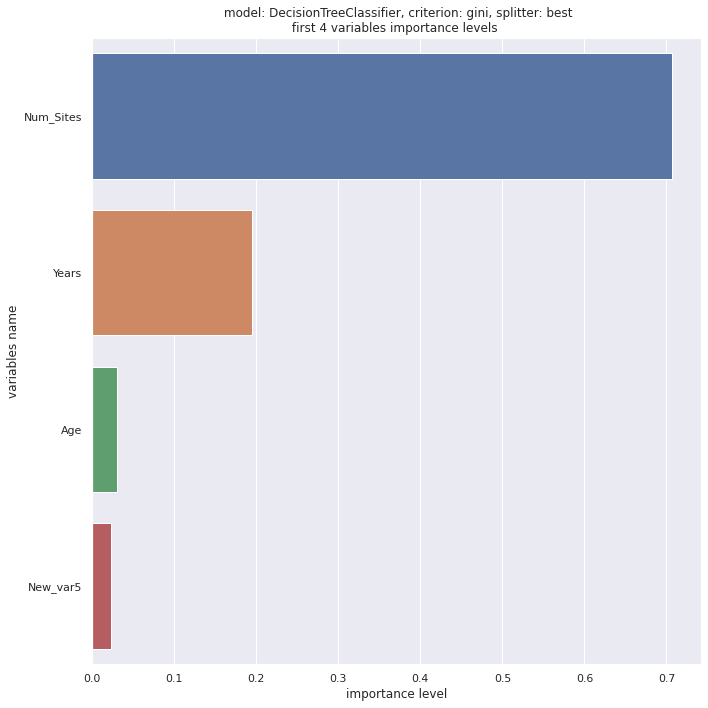

In [85]:
feature_imp_plot(best_cart_model_tuned, X_train, 4)

# Learning Curves

In [86]:
train_score, test_score = validation_curve(best_cart_model_tuned, X, y, param_name="max_depth", param_range=(1, 11),
                                           scoring="f1")

In [87]:
def val_curve_params(model, X, y, param_name, param_range, scoring, cv):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")

    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)
    

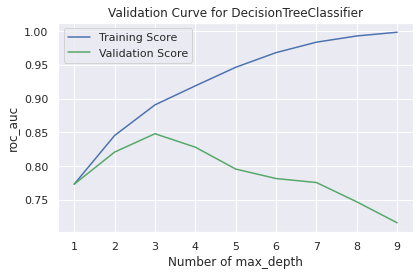

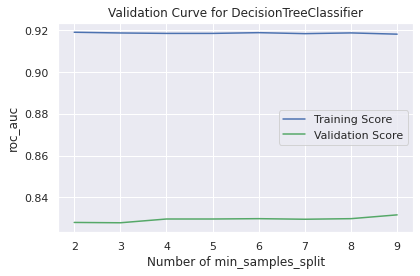

In [88]:
cart_val_params = [["max_depth", range(1, 10)], ["min_samples_split", range(1, 10)]]
for i in range(len(cart_val_params)):
    val_curve_params(best_cart_model_tuned, X_train, y_train,
                     param_name=cart_val_params[i][0],
                     param_range=cart_val_params[i][1],
                     scoring="roc_auc",
                     cv=5)

# Decision Tree Visualization

In [89]:

def tree_graph(model, col_names, file_name):
    """
    karar agacımızın görselleştirilmesi

    :param model: model nesnesi
    :param col_names: hiperparametre adımız
    :param file_name: kayıt ismi
    :return:
    """
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)
    

In [92]:
tree_graph(model=best_cart_model_tuned, col_names=X.columns, file_name="finl.png")

# Extracting Decision Rules

In [95]:
tree_rules = export_text(best_cart_model_tuned, feature_names=list(X.columns))

In [96]:
print(tree_rules)

|--- Num_Sites <= 0.83
|   |--- Num_Sites <= 0.50
|   |   |--- New_var4 <= 1.84
|   |   |   |--- Years <= -0.08
|   |   |   |   |--- class: 0.0
|   |   |   |--- Years >  -0.08
|   |   |   |   |--- class: 0.0
|   |   |--- New_var4 >  1.84
|   |   |   |--- Num_Sites <= 0.17
|   |   |   |   |--- class: 0.0
|   |   |   |--- Num_Sites >  0.17
|   |   |   |   |--- class: 1.0
|   |--- Num_Sites >  0.50
|   |   |--- Years <= 1.08
|   |   |   |--- Account_Manager <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- Account_Manager >  0.50
|   |   |   |   |--- class: 0.0
|   |   |--- Years >  1.08
|   |   |   |--- Age <= 0.31
|   |   |   |   |--- class: 1.0
|   |   |   |--- Age >  0.31
|   |   |   |   |--- class: 1.0
|--- Num_Sites >  0.83
|   |--- Years <= -0.38
|   |   |--- Age <= -0.19
|   |   |   |--- New_var4 <= 0.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- New_var4 >  0.00
|   |   |   |   |--- class: 0.0
|   |   |--- Age >  -0.19
|   |   |   |--- Years <= -0.46
|   |   |   |   

# Extracting Python & SQL Rules

In [105]:
print(skompile(best_cart_model_tuned.predict).to('python/code'))

((((0 if x[3] <= -0.07831325381994247 else 0) if x[8] <= 1.8418750762939453
     else 0 if x[4] <= 0.1666666716337204 else 1) if x[4] <= 
    0.5000000149011612 else (0 if x[2] <= 0.5 else 0) if x[3] <= 
    1.0753012299537659 else 1 if x[0] <= 0.3125 else 1) if x[4] <= 
    0.8333333432674408 else ((0 if x[8] <= 0.002567648043623194 else 0) if 
    x[0] <= -0.1875 else 1 if x[3] <= -0.46385543048381805 else 0) if x[3] <=
    -0.3825301229953766 else (1 if x[9] <= -0.280186727643013 else 1) if x[
    4] <= 1.1666666865348816 else 1 if x[1] <= -0.7390201985836029 else 1)



In [106]:
print(skompile(best_cart_model_tuned.predict).to('sqlalchemy/sqlite'))

SELECT CASE WHEN (x5 <= 0.8333333432674408) THEN CASE WHEN (x5 <= 0.5000000149011612) THEN CASE WHEN (x9 <= 1.8418750762939453) THEN 0 ELSE CASE WHEN (x5 <= 0.1666666716337204) THEN 0 ELSE 1 END END ELSE CASE WHEN (x4 <= 1.0753012299537659) THEN 0 ELSE 1 END END ELSE CASE WHEN (x4 <= -0.3825301229953766) THEN CASE WHEN (x1 <= -0.1875) THEN 0 ELSE CASE WHEN (x4 <= -0.46385543048381805) THEN 1 ELSE 0 END END ELSE 1 END END AS y 
FROM data


# Predictinon

In [107]:
def predict_with_python_code(x):
    return (((0 if x[1] <= -1.0101985037326813 else 0) if x[3] <= -0.10843373462557793
             else 0 if x[4] <= 0.1666666716337204 else 0) if x[4] <=
                                                             0.5000000149011612 else (
        0 if x[3] <= 0.3614457845687866 else 0) if x[4
                                                   ] <= 0.8333333432674408 else 0 if x[
                                                                                         3] <= -0.39457830786705017 else 1)

In [108]:

Q = [38.0, 10863.05, 1, 5.59, 11.0, 4.0, 3.0, 3.0, 0.147105, 46.287428]

In [109]:
predict_with_python_code(Q)

1

# Saving Model

In [112]:
joblib.dump(best_cart_model_tuned, "best_cart_model_tuned.pkl")

['best_cart_model_tuned.pkl']